In [21]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import pauli_error
import matplotlib.pyplot as plt
import numpy as np

In the general or the ideal scenario, there is no noise. We can expect the program or code to run in the following manner as shown below:

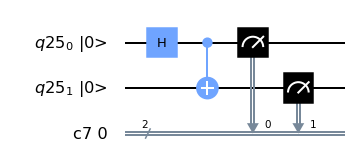

In [18]:
qb = QuantumRegister(2)
cb = ClassicalRegister(2)
qc = QuantumCircuit(qb,cb)
qc.h(0)
qc.cx(0,1)
qc.measure(qb,cb)
qc.draw(initial_state = True,output = 'mpl')

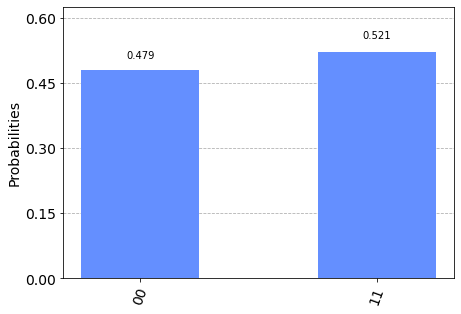

In [17]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend)
counts = job.result().get_counts(qc)
plot_histogram(counts)

The above circuit results in the formation of two states which are the 00 and 11 states. Further according to question given there should be noise in the channel in between the hadamard gate(H gate) and the CNOT gate. This can be done by inserting two gates that act as noise.

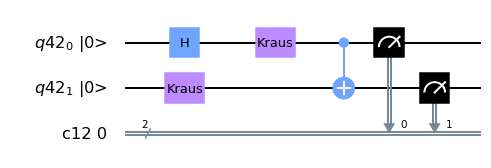

In [32]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
mycircuit = QuantumCircuit(q,c)
mycircuit.h(0)

E1=pauli_error([('X',0.15),('I',0.7),('Z',0.15)]) 
E2=pauli_error([('X',0.15),('I',0.7),('Z',0.15)]) 
mycircuit.append(E1, [0])
mycircuit.append(E2, [1])

mycircuit.cx(0,1)
mycircuit.measure(q,c)
mycircuit.draw(initial_state=True, output="mpl")

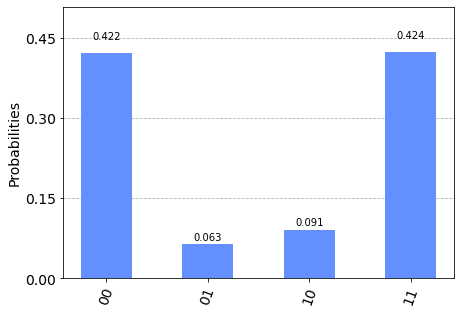

In [33]:
job = execute(mycircuit,backend)
counts = job.result().get_counts(mycircuit)
plot_histogram(counts)

As you can see clearly that the states 01 and 10 also occur as the outcomes of the measurement. This is due to the noise in the channeL, and this noise is what we want to eliminate to the greatest extent in our circuit. There occurs bit flip or phase flip due the noise present and to tackle that we need to implement the bit-flip and phase-flip error correction circuit. There are now more possible states since the phase can be flipped and we can have '-|10>' or '-|11>'(where we assumed that bit flip can occur).

   I was not sure whether we can implement the error correction after the bell state is made or just after the first H gate implementation.So, I made two different attempts to solve the task. Also I saw that bit flip error can cause phase flip error and hamper the proper functioning of the error correction circuit. So we first apply the bit flip error correction circuit. Also, Phase flip and Bit flip correction circuits when used together can result in the correct solution of the problem faced. 

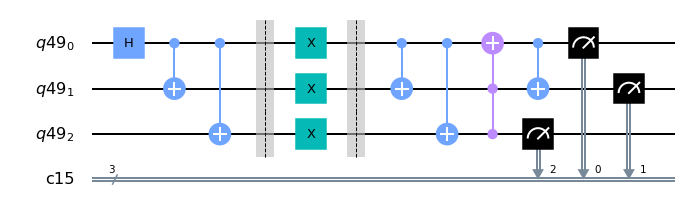

In [36]:
# The problem as described in the Screening Task Sheet
#Initialization
qb = QuantumRegister(3)
cb = ClassicalRegister(3)
mycircuit = QuantumCircuit(qb,cb)
#Applying Gates
mycircuit.h(0)
mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.barrier()

#Noisy Channel#
#Taking noise which results in a bit flip
mycircuit.x(qb)
mycircuit.barrier()
#Noisy Channel#


mycircuit.cx(0,1)
mycircuit.cx(0,2)
mycircuit.ccx(2,1,0)
mycircuit.cnot(0,1)
#Measurement
mycircuit.measure(qb,cb)
mycircuit.draw("mpl")

In [14]:
#Defining Backend and seeing the statistics
backend = BasicAer.get_backend('qasm_simulator')
job = execute(mycircuit, backend, shots=1000)
job.result().get_counts(mycircuit)

{'000': 494, '011': 506}

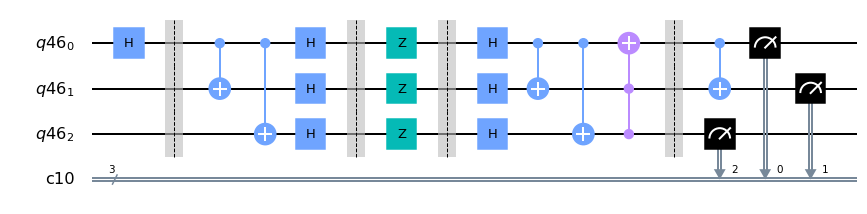

In [18]:
#Initialization
qb = QuantumRegister(3)
cb = ClassicalRegister(3)
mycircuit = QuantumCircuit(qb,cb)

#Applying Gates
mycircuit.h(0)
mycircuit.barrier()

#Encoding
mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.h(qb)
mycircuit.barrier()

#Noisy Channel#
mycircuit.z(qb)
mycircuit.barrier()
#Noisy Channel#

#Decoding
mycircuit.h(qb)
mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.ccx(1,2,0)
mycircuit.barrier()
mycircuit.cnot(0,1)

#Measurement
mycircuit.measure(qb,cb)
mycircuit.draw("mpl")

In [17]:
#Defining Backend and getting stats
backend = BasicAer.get_backend('qasm_simulator')
job = execute(mycircuit, backend, shots=1000)
job.result().get_counts(mycircuit)

{'000': 504, '011': 496}